**Project Name :- Fake News Detection Using Machine Learning**

# **Problem Statement**:-



This project addresses the challenge of detecting fake news in online platforms using Natural Language Processing and machine learning techniques. Textual data is preprocessed and transformed into vector representations, after which classification models such as Random Forest, AdaBoost, and XGBoost are trained. Their effectiveness is evaluated using accuracy scores and confusion matrices to analyze prediction performance and misclassification patterns.

# **Data Introduction**

This dataset is designed for practicing fake news detection using machine learning and natural language processing (NLP) techniques. It includes a rich collection of 20,000 news articles, carefully generated to simulate real-world data scenarios. Each record contains metadata about the article and a label indicating whether the news is real or fake.

The dataset also intentionally includes around 5% missing values in some fields to simulate the challenges of handling incomplete data in real-life projects.

In [1]:
pip install gensim

In [2]:
import  matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
df_new = pd.read_csv("/content/fake_news_dataset.csv")

In [4]:
df_new

,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake
...,...,...,...,...,...,...,...
19995,House party born.,hit and television I change very our happy doo...,2024-12-04,BBC,Gary Miles,Entertainment,fake
19996,Though nation people maybe price box.,fear most meet rock even sea value design stan...,2024-05-26,Daily News,Maria Mcbride,Entertainment,real
19997,Yet exist with experience unit.,activity loss very provide eye west create wha...,2023-04-17,BBC,Kristen Franklin,Entertainment,real
19998,School wide itself item.,term point general common training watch respo...,2024-06-30,Reuters,David Wise,Health,fake


In [5]:
df_new.head()

,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake


In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     20000 non-null  object
 1   text      20000 non-null  object
 2   date      20000 non-null  object
 3   source    19000 non-null  object
 4   author    19000 non-null  object
 5   category  20000 non-null  object
 6   label     20000 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [7]:
df_new.describe()

,title,text,date,source,author,category,label
count,20000,20000,20000,19000,19000,20000,20000
unique,20000,20000,1096,8,17051,7,2
top,Foreign Democrat final.,more tax development both store agreement lawy...,2023-08-31,Daily News,Michael Smith,Health,fake
freq,1,1,32,2439,12,2922,10056


In [8]:
df_new.columns = df_new.columns.str.strip()

# Now replace fake/real with 0/1 in the same column
df_new['label'] = df_new['label'].map({'real': 1, 'fake': 0})

# Double-check columns
print(df_new.columns)

# Preview
print(df_new[['text', 'label']].head())

Index(['title', 'text', 'date', 'source', 'author', 'category', 'label'], dtype='object')
                                                text  label
0  more tax development both store agreement lawy...      1
1  probably guess western behind likely next inve...      0
2  them identify forward present success risk sev...      0
3  phone which item yard Republican safe where po...      0
4  wonder myself fact difficult course forget exa...      0


In [9]:
df_new.isna().sum()

,0
title,0
text,0
date,0
source,1000
author,1000
category,0
label,0


In [10]:
df_new = df_new.drop(columns=['source', 'author','date'])

In [11]:
df_new.isna().sum()

,0
title,0
text,0
category,0
label,0


In [12]:
df_new.head()

,title,text,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,Politics,1
1,To offer down resource great point.,probably guess western behind likely next inve...,Politics,0
2,Himself church myself carry.,them identify forward present success risk sev...,Business,0
3,You unit its should.,phone which item yard Republican safe where po...,Science,0
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,Technology,0


**Data Visualization**

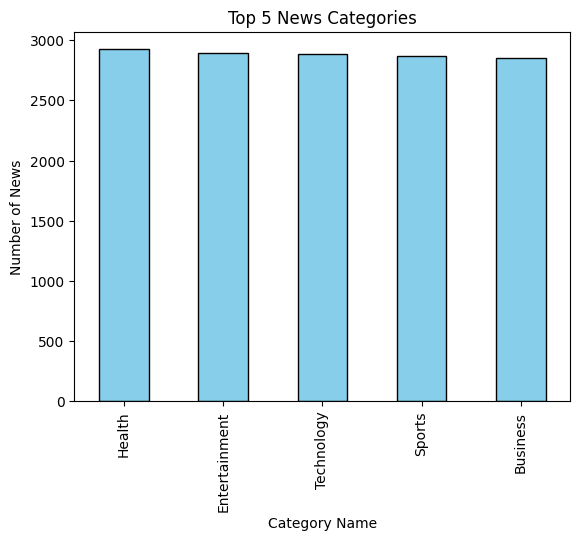

In [13]:
##Bar/Column chart for top 5 categories
top_5_categories = df_new['category'].value_counts().nlargest(5)
top_5_categories.plot(kind='bar', edgecolor='black', stacked=True, color='skyblue')

plt.xlabel('Category Name')
plt.ylabel('Number of News')
plt.title('Top 5 News Categories')
plt.show()


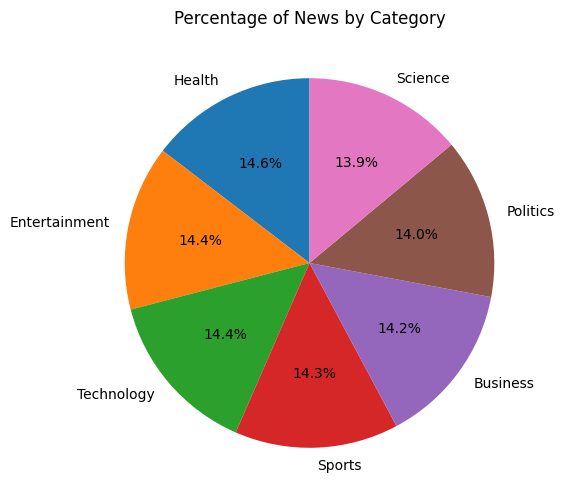

In [14]:
##Pie chart for percentage of news in different categories
category_counts = df_new['category'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of News by Category')
plt.show()

In [15]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, punctuation, numbers (keep only letters and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply to dataset
df_new['clean_text'] = df_new['text'].apply(clean_text)

# Preview
print(df_new[['text', 'clean_text']].head())

                                                text  \
0  more tax development both store agreement lawy...   
1  probably guess western behind likely next inve...   
2  them identify forward present success risk sev...   
3  phone which item yard Republican safe where po...   
4  wonder myself fact difficult course forget exa...   

                                          clean_text  
0  more tax development both store agreement lawy...  
1  probably guess western behind likely next inve...  
2  them identify forward present success risk sev...  
3  phone which item yard republican safe where po...  
4  wonder myself fact difficult course forget exa...  


In [16]:
# drop unnecessary columns for classification purpose
df_new= df_new.drop(['title','category'],axis=1)

In [17]:
df_new.head()

,text,label,clean_text
0,more tax development both store agreement lawy...,1,more tax development both store agreement lawy...
1,probably guess western behind likely next inve...,0,probably guess western behind likely next inve...
2,them identify forward present success risk sev...,0,them identify forward present success risk sev...
3,phone which item yard Republican safe where po...,0,phone which item yard republican safe where po...
4,wonder myself fact difficult course forget exa...,0,wonder myself fact difficult course forget exa...


In [18]:
# apply wordopt method to the whole dataset and view the text content of a random data point
def wordopt(text):
    text = str(text).lower()                           # convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)               # remove text inside brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # remove URLs
    text = re.sub(r'<.*?>+', '', text)                # remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)              # keep only alphabets
    text = re.sub(r'\s+', ' ', text).strip()          # remove extra spaces
    return text

# Apply wordopt to dataset
df_new['text'] = df_new['text'].apply(wordopt)

# View text content of a specific data point (example: index 100)
print("Cleaned text at index 100:\n", df_new['text'][100])

Cleaned text at index 100:
 challenge include economic place travel media within maintain green even produce decade series business support business worker ten generation front fast weight message task boy join commercial discover light adult keep today note mind forward customer general perform degree size participant prevent government enter benefit color assume describe me service go good never decision spring forward may turn study other staff night medical have prove laugh perhaps relationship relate all then bar next ball official direction heavy fall voice behind company likely culture wait former event know window attack team whole style ago employee push single cost sense ten federal successful table everything despite current word customer short coach general experience prove daughter here would total in culture view in evening approach approach yeah teacher forget research accept loss threat bring maintain then process clear movie bed sea only expert blood total child ahead 

In [19]:
X = df_new['clean_text']
y = df_new['label']

**Spliting of dataset into training and testing sets with 25% test size**

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Train size:", len(x_train), "Test size:", len(x_test))

Train size: 15000 Test size: 5000


In [22]:
# import bbc_news data using url link in json format for training Word2Vec word embedding model
news = pd.read_json('https://query.data.world/s/7c6p2lxb3wjibfsfbp4mwy7p7y4y2d?dws=00000')
news_seg = news['content']
print("Size of Word Dictonary for training Word2Vec: ",news_seg.shape[0])
news_seg.head(2)

Size of Word Dictonary for training Word2Vec:  15825


,content
0,The heroin substitute methadone can be used as...
1,The eldest son of North Korean leader Kim Jong...


In [23]:
# apply wordopt function for text processing
news_seg=news_seg.apply(wordopt)
sentences = [sentence.split() for sentence in news_seg ]
w2v_model = Word2Vec(sentences,  window=5, min_count=5, workers=4)

In [24]:
#function to convert a sentence into vector form
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

In [25]:
# convert train and test dataset into vector form
xv_train = np.array([vectorize(sentence) for sentence in x_train])
xv_test = np.array([vectorize(sentence) for sentence in x_test])

In [26]:
from google.colab import drive
import pickle
drive.mount('/content/drive')
with open("/content/drive/MyDrive/random_forest_model.pkl", "rb") as f:
    rf_model = pickle.load(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
y_pred1 = rf_model.predict(xv_test)
print("Prediction on test data: ",y_pred1)
print("Accuracy Score on Test Data: ",rf_model.score(xv_test,y_test))

Prediction on test data:  [1 1 1 ... 0 1 1]
Accuracy Score on Test Data:  0.51


In [28]:
print('Accuracy:', accuracy_score(y_test, y_pred1))
print('Precision:', precision_score(y_test, y_pred1))
print('Recall:', recall_score(y_test, y_pred1))
print('F1 score:', f1_score(y_test, y_pred1))

Accuracy: 0.51
Precision: 0.5050420168067227
Recall: 0.7252614641995173
F1 score: 0.595442536327609


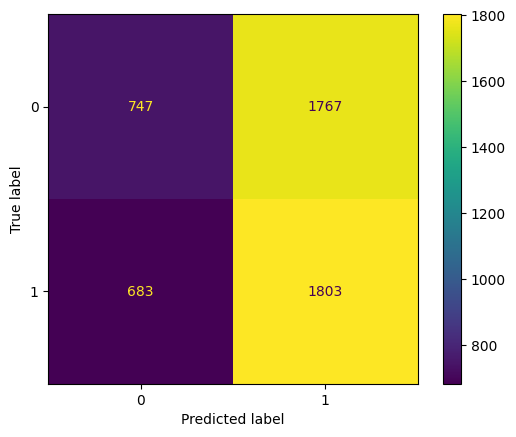

In [29]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_pred1)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

**TF-IDF Vectorization**

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF
vect_tfidf = TfidfVectorizer(max_features=10000, stop_words="english")
x_train_tfidf = vect_tfidf.fit_transform(x_train)
x_test_tfidf  = vect_tfidf.transform(x_test)

**AdaBoost**

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

ada = AdaBoostClassifier(n_estimators=200, random_state=42)
ada.fit(x_train_tfidf, y_train)
y_pred_ada = ada.predict(x_test_tfidf)

print("AdaBoost + TF-IDF Accuracy:", accuracy_score(y_test, y_pred_ada))

AdaBoost + TF-IDF Accuracy: 0.514


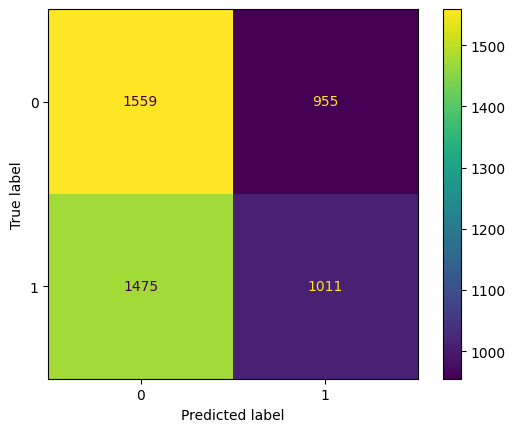

In [32]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_pred_ada)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

**XGBoost**

In [33]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6,
                    random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb.fit(x_train_tfidf, y_train)
y_pred_xgb = xgb.predict(x_test_tfidf)

print("XGBoost + TF-IDF Accuracy:", accuracy_score(y_test, y_pred_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:47:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost + TF-IDF Accuracy: 0.5114


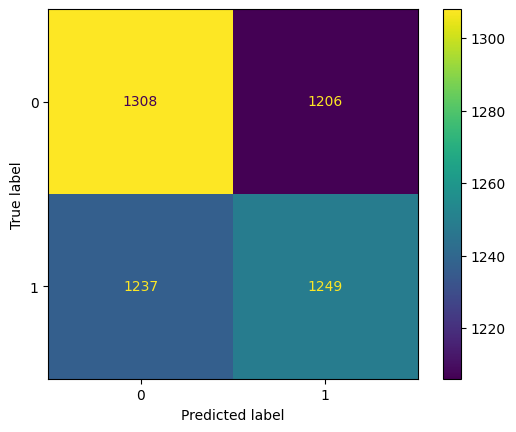

In [34]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_pred_xgb)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()